In [1]:
import sys
import numpy as np
import math
sys.path.append("../build/python")  # set to correct path for module
import varttpy

In [2]:
#tmat=np.loadtxt("../examples/ex11_irlm/data/t_IRLM_NRG_N32_U-0.5_t0.15_Lambda2.0_ed0_Nkept150.dat")
#Pmat=np.loadtxt("../examples/ex11_irlm/data/P_IRLM_NRG_N32_U-0.5_t0.15_Lambda2.0_ed0_Nkept150.dat")
tmat=np.loadtxt("../examples/ex11_irlm/data/t_IRLM_NRG_N16_U-0.5_V0.15_Lambda2.0_ed0.0_Nkept200.dat")
Pmat=np.loadtxt("../examples/ex11_irlm/data/P_IRLM_NRG_N16_U-0.5_V0.15_Lambda2.0_ed0.0_Nkept200.dat")

In [3]:
model=varttpy.IRLM(tmat, Pmat, U=-0.5)
sol=varttpy.DMRG0(model.Ham())

In [4]:
sol.bond_dim=128
sol.nIter_diag=64
Npart=model.NParticle();
print("sweep energy Npart")
for i in range(10):
    sol.iterate()
    print(i+1, sol.energy, sol.Expectation(Npart))

cc=model.CalculateCiCj(sol.gs)
eval=np.sort( np.linalg.eigvals(cc) )

sweep energy Npart
1 -1.4036858311489289 8.000000000070848
2 -1.4036858311897327 7.999999999999767
3 -1.4036858311899 7.999999999999811
4 -1.4036858311899503 7.999999999999823
5 -1.4036858311899745 7.999999999999816
6 -1.4036858311899876 7.999999999999812
7 -1.403685831189999 7.999999999999804
8 -1.4036858311900062 7.999999999999805
9 -1.4036858311900091 7.999999999999821
10 -1.4036858311900178 7.999999999999812


In [6]:
sol=varttpy.DMRG0(model.Ham(), sol.gs)
print("sweep energy Npart")
for i in range(10):
    sol.iterate()
    print(i+1, sol.energy, sol.Expectation(Npart))

cc=model.CalculateCiCj(sol.gs)
eval=np.sort( np.linalg.eigvals(cc) )

sweep energy Npart
1 -1.4036858311900258 7.99999999999981
2 -1.4036858311900247 7.9999999999998055
3 -1.4036858311900322 7.999999999999819
4 -1.4036858311900333 7.999999999999814
5 -1.403685831190035 7.999999999999807
6 -1.4036858311900398 7.999999999999827
7 -1.4036858311900386 7.999999999999796
8 -1.4036858311900415 7.9999999999998
9 -1.40368583119004 7.999999999999804
10 -1.4036858311900453 7.999999999999805


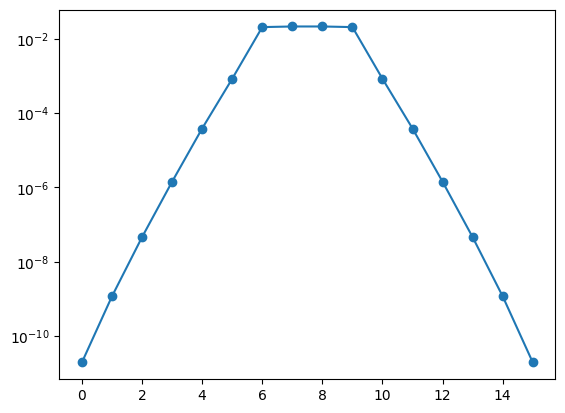

In [7]:
import matplotlib.pyplot as plt
plt.yscale('log')
plt.plot([min(x,1-x) for x in eval], '-o')

In [9]:
print("Npart=",sol.Expectation(Npart))
print("sigma H2-E^2")
m=sol.bond_dim
for mi in [m//2, m, 2*m, 3*m, 4*m]:
    print(sol.sigma(mi)/sol.energy, np.sqrt(sol.H2(mi)/sol.energy**2-1) )

Npart= 7.999999999999805
sigma H2-E^2
-4.577852765940258e-09 0.00013861465264920336
-2.587420436669623e-08 6.3922160596853525e-06
-2.0455498677852195e-07 3.315299073053448e-07
-2.714770380980654e-07 2.862419592186592e-07
-2.720113891257677e-07 2.739545153208112e-07
